In [2]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from tqdm import tqdm

In [3]:
dataset = pd.read_csv('../../data/funda_train.csv')

# EDA

1. 0, Nan 값 체크

2. 시간 별 매출
3. 지역 별 매출
4. 업종 별 매출
5. 가게 별 매출

In [4]:
dataset['year_month'] = dataset['transacted_date'].str[0:7]

In [5]:
subset = dataset[['store_id','amount','year_month']]
subset

,store_id,amount,year_month
0,0,1857.142857,2016-06
1,0,857.142857,2016-06
2,0,2000.000000,2016-06
3,0,7857.142857,2016-06
4,0,2000.000000,2016-06
...,...,...,...
6556608,2136,-4500.000000,2019-02
6556609,2136,4142.857143,2019-02
6556610,2136,4500.000000,2019-02
6556611,2136,571.428571,2019-02


In [66]:
finalset=pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []})
finalset

,store_id,amount,year_month


In [103]:
finalset=pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []})

store = subset.loc[subset['store_id'] == 0]
finalset['amount'] = store.groupby(['year_month'])['amount'].agg('sum').values
finalset['year_month'] = store.groupby(['year_month'])['amount'].agg('sum').index
finalset['store_id'] = 0


for i in tqdm(subset['store_id'].unique()[1:50]): # 시작은 1 고정

    tempset = pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []})

    store_ = subset.loc[subset['store_id'] == i]

    tempset['amount'] = store_.groupby(['year_month'])['amount'].agg('sum').values
    tempset['year_month'] = store_.groupby(['year_month'])['amount'].agg('sum').index
    tempset['store_id'] = i

    finalset = pd.concat([finalset,tempset], axis = 0)

finalset = finalset.reset_index(drop=True)

100%|██████████| 49/49 [00:00<00:00, 53.28it/s]


In [104]:
finalset['datetime'] = pd.to_datetime(finalset['year_month'] + '-25', format='%Y-%m-%d')

In [105]:
finalset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   store_id    1550 non-null   int64         
 1   amount      1550 non-null   float64       
 2   year_month  1550 non-null   object        
 3   datetime    1550 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 48.6+ KB


In [106]:
def store_plot(dataset, start, end):
    sns.set_style('whitegrid')
    plt.figure(figsize=(26, 6))
    for i in finalset['store_id'].unique()[start:end]:
        dataset_ = finalset.loc[(finalset['store_id'] == i), ['amount', 'datetime']]
        group = (dataset_['amount']/10000).groupby(dataset_['datetime'])
        plt.plot(group.sum().index, group.sum().values, label='store_{}'.format(i)) 
    plt.legend()
    print(group.sum().index)

DatetimeIndex(['2016-10-25', '2016-11-25', '2016-12-25', '2017-01-25',
               '2017-02-25', '2017-03-25', '2017-04-25', '2017-05-25',
               '2017-06-25', '2017-07-25', '2017-08-25', '2017-09-25',
               '2017-10-25', '2017-11-25', '2017-12-25', '2018-01-25',
               '2018-02-25', '2018-03-25', '2018-04-25', '2018-05-25',
               '2018-06-25', '2018-07-25', '2018-08-25', '2018-09-25',
               '2018-10-25', '2018-11-25', '2018-12-25', '2019-01-25',
               '2019-02-25'],
              dtype='datetime64[ns]', name='datetime', freq=None)


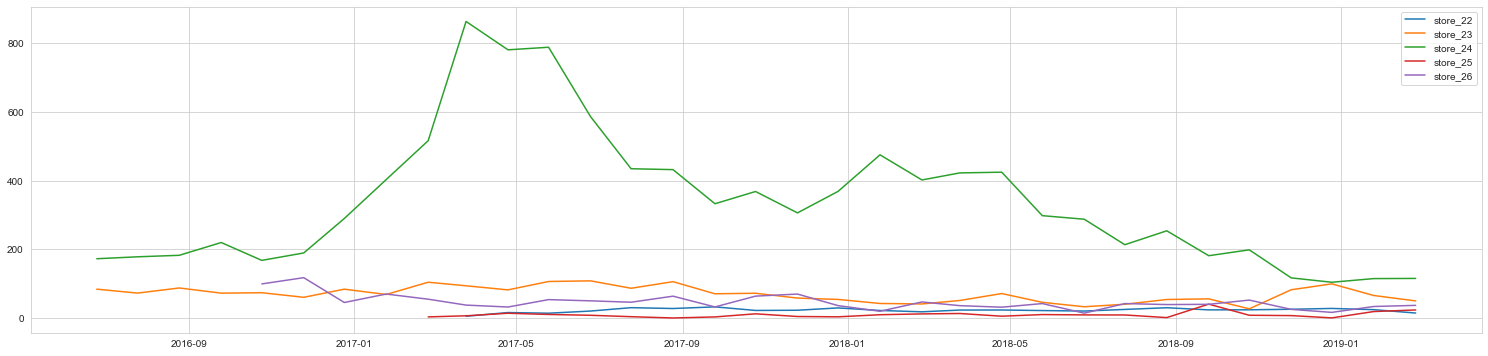

In [108]:
store_plot(store_plot, 20, 25)